In [18]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Optimización

<div style="text-align: justify; font-size: 1.1rem;">

Las primeras preguntas que surgen en relación a este tema y el mundo de Machine Learning son:
* ¿Qué es optimizar?
* ¿Cómo encontrar el óptimo matemática y computacionalmente?

Los conceptos centrales a ver para entender esto son: **Optimización, Métodos iterativos (gradiente descendiente) y convexidad**
</div>

## Optimización

<div style="text-align: justify; font-size: 1.1rem;">

Optimizar básicamente es buscar la manera de realizar algo más eficientemente (ahorrar tiempo, dinero, esfuerzo, etc), y lo hacemos cotidianamente, a vaces conscientemente y otras de manera más arbitraria. Siempre estamos maximizando o minimizando algo para optimizar.

Por ejemplo: tomar el colectivo que nos lleva más rápido del punto A al punto B.

Toda optimización incluye:
* Tomar una **decisión**, que vive en un **Espacio de Decisión**. Ejemplo: elegir la línea de colectivo más adecuada para lo que pretendemos hacer (llegar más rápido de A a B)
* Definir en qué nos basamos para **justificar/guiar** nuestra elección de ese óptimo, tenemos una **Función de Costo/Recompensa** también llamada **Función Objetivo** (como una función matemática cuyo resultado nos permitirá justificar que la decisión 1 o decisión 2 es la más adecuada). Ejemplo: tomar este colectivo de esta línea porque el tiempo de viaje es menor
* Usamos algún **método** para que la elección de la opción final sea la óptima según la métrica elegida. Por ejemplo: usamos Google Maps para usar como guía o referencia para finalmente estar seguros de la elección de esa línea de colectivos.

En resumen, tenemos entonces tres partes en la optimización para hacer algo de manera eficiente:
* ¿Qué decido hacer para optimizar esa tarea?
* ¿Por qué tomo esa decisión en particular? ¿Cuál es la función costo/beneficio?
* ¿Qué uso como referencia para tomar esa decisión?
</div>

### Espacio de Decisión

<div style="text-align: justify; font-size: 1.1rem;">

El objetivo de optimizar es, como dijimos, encontrar la solución más óptima/eficiente para concretar una tarea. Esa decisión que tomamos debemos pensarla como la mejor alternativa u opción que tomamos y que forma parte de un espacio de decisión. Por ejemplo, el conjunto de posibles líneas de colectivos a tomar para llegar más rápido del punto A al punto B sería un espacio de decisión.

Si nuestro valor óptimo (decisión que tomamos) es $\color{orange}{x^*}$ (x chiquita estrella) decimos que 

$$
\color{orange}{x^* \in \mathbf{X} \quad \mathbf{X} \subseteq \mathbb{R^n}}
$$

donde $\color{orange}{\mathbf{X}}$ (X grande) es nuestro espacio de decisión. Este, puede estar contenido o ser igual a un espacio como ser $\color{orange}{\mathbf{R^n}}$. Notese que $\color{orange}{\mathbf{R^n}}$ es un ejemplo, puede ser cualquier otro conjunto de posibles decisiones. 

Los espacio de decisión pueden ser conjuntos discretos y finitos (como la cantidad de líneas de colectivos), o bien continuos. Ejemplo de esto útlimo puede ser las posibilidades de rango de tiempo que tengo para elegir para estudiar un tema (hasta que me decante por una opción, que será mi decisión final, por ej, elijo estudiar este tema 1/2hs).

</div>

### Función Costo/Recompensa o Función Objetivo

<div style="text-align: justify; font-size: 1.1rem;">

Las funciones que queremos optimizar pueden ser definidas de manera sencilla o necesitar de un proceso de modelado, seguramente definido a través de una función (una función matemática). Esto es lo que utilizaremos como métrica para evaluar cuán bien o cuán mal estamos al momento de tomar la decisión. 
Definir bien una función de costo es importantísimo a la hora de optimizar, porque a fin de cuentas, estamos optimizando contra un modelo de lo que consideramos costo o recompensa. Depende qué elijamos, el valor óptimo será distinto, ya que un valor óptimo para una función puede ser subóptimo para otra.

Definamos por ejemplo la función de recompensa *educativa* (recompensa de un concepto bien aprendido al estudiar) por las horas estudiadas, o que se dará en función de las horas estudiadas. Por ejemplo:

$$
\color{orange}{f(x)=-(x-3)^2 + 8}
$$

(son arbitrarios los números usados, fueron elegidos solamente para poder obtener una función recompensa positiva con valores de tiempo positivo)
</div>

In [19]:
x_r = np.linspace(start=-4,stop=10,num=100)

def reward(x):
    return -(x-3)**2 + 8 # usa el broadcasting cuando recibe un array de numpy

y_r = reward(x_r)

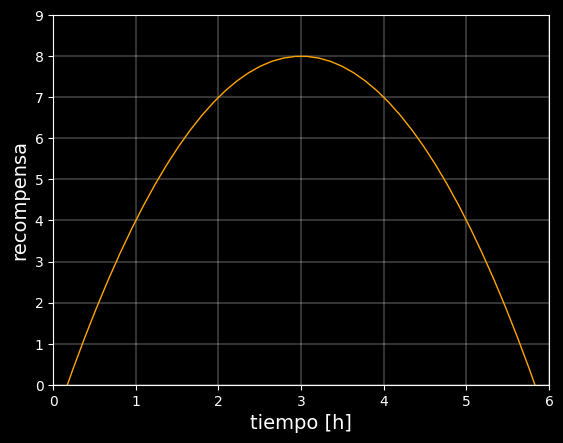

In [20]:
# fig = plt.figure(figsize=(12,5))
plt.plot(x_r,y_r,linewidth=1, color="orange")
plt.grid(linewidth=0.3)
plt.xlabel("tiempo [h]", fontsize=14)
plt.ylabel("recompensa", fontsize=14)
plt.xlim(0, 6)
plt.ylim(0, 9)
plt.show()

<div style="text-align: justify; font-size: 1.1rem;">

Esta función es interesante porque al ser continua nos permite darnos cuenta de lo siguiente:

- a medida que el tiempo de estudio incrementa aumenta la recompensa
- el valor del tiempo de estudio vale más en las primeras horas
- hay un punto justo de máxima verdad, máxima sabiduría 
- si agregamos más horas solamente me termino quemando y es contraproducente.

Nosotros queremos maximizar la recompensa, y haciendo eso tendremos un valor de tiempo que deberíamos estudiar si este modelo realmente funcionase. Este valor óptimo es el más importante ya que es el que va a guiar nuestra decisión final. 
Entonces:

$$
\color{orange}{x_{\text{óptimo}} = x^{*}}
$$

donde 

$$
\color{orange}{x^{*} = \underset{x}{\arg\max} \ f(x)}
$$

esto se lee de la siguiente forma: $\color{orange}{{x ^*}}$ es el valor de $\color{orange}{x}$ que maximiza el valor de $\color{orange}{f(x)}$. Aquí $\color{orange}{\arg}$ lo que señala es que estamos buscando el valor de tiempo (o sea, el valor de $x$, NO el valor de $f(x)$) que maximiza la recompensa.

Si nos interesara encontrar el valor máximo de recompensa $r$ deberíamos escribirlo de la siguiente forma

$$
\color{orange}{r = \max \ f(x)}
$$

Generalmente los valores propios de ese maximo no nos importan mucho, es el argumento que maximiza la función de costo lo que buscamos. 

En el ejemplo del gráfico de la recompensa educativa obtenida según el tiempo que se usa para estudiar hallamos a simple vista que el valor de $\color{orange}{{x ^*}}$ (o sea, el valor de $x$ donde $f(x)$ alcanza su máximo su óptimo) es $x = 3$.
</div>

### Hallando el óptimo

<div style="text-align: justify; font-size: 1.1rem;">

Para continuar con el ejemplo de la recompensa óptima según la cantidad de tiempo invertido para estudiar, hallaremos el óptimo de esta función con un método determinista para luego dar pie a los métodos iterativos. 

La derivada es lo que nos permite entender cómo varía una función de acuerdo a el o los valores de entrada. Recordemos que en funciones de un valor de entrada y un valor de salida, la derivada gráficamente representa la pendiente de la recta tangente. En los máximos o mínimos las variaciones son nulas (la pendiente de la recta tangente es cero). 

<br>

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjv3rEPpJeMu4at-UZz6hC6U94tSEac6k_8g&usqp=CAU" height=300 width=300></center>

Entonces esto indica que si derivamos e igualamos la función derivada a cero podríamos encontrar el valor de x que maximiza la recompensa. Calculamos la derivada de la función modelo que usamos

$$
\color{orange}{f'(x) = -2(x-3)}
$$

$$
\color{orange}{-2(x-3)=0 \ \implies \ x=3}
$$

</div>

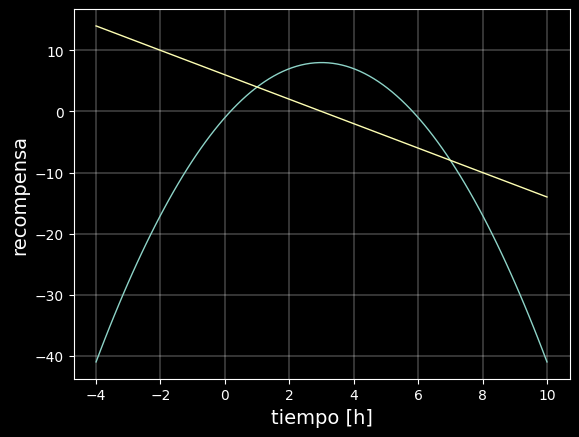

In [21]:
# Ejemplo practicando con Sympy:
f, x = sp.symbols('f, x') 
f = -(x-3)**2 + 8

deriv_reward = sp.diff(f) 

f_for_numpy = sp.lambdify(x, f, "numpy")
y_r = f_for_numpy(x_r)

deriv_reward_for_numpy = sp.lambdify(x, deriv_reward, "numpy")
deriv_y_r = deriv_reward_for_numpy(x_r)

# Ejemplo más acotado (por ser sencilla la funcion)
# deriv_reward = lambda x: -2*(x-3)
# y_deriv = deriv_reward(x_r)

plt.plot(x_r,y_r,linewidth=1, label="recompensa, f(x)")
plt.plot(x_r,deriv_y_r, linewidth=1, label="derivada recompensa, f'(x)")
plt.xlabel("tiempo [h]", fontsize=14)
plt.ylabel("recompensa", fontsize=14)
plt.grid(linewidth=0.3)
plt.show()

## Puntos críticos

<div style="text-align: justify; font-size: 1.1rem;">
    
* Para funciones de **una variable** (una sola variable independiente) un punto $\color{orange}{x_0}$ es **crítico** para $\color{orange}{f}$ si 

$$
\color{orange}{f^{'}(x_0) = 0 }
$$

Es decir, la función derivada evaluada en ese punto es igual a cero

* Para una función multivariable (más de una variable independiente) un punto $\color{orange}{\mathbf{x_0}}$ es **crítico** para $\color{orange}{g}$ si

$$
\color{orange}{\left.{\nabla g } \right|_{\mathbf{x_0}} = \mathbf{\vec{0}}} 
$$

Es decir, el vector gradiente evaluado en ese punto, da como resultado el vector nulo. Recordar que el vector gradiente se forma con las derivadas parciales, de forma que cada componente del vector gradiente corresponde a la derivada parcial respecto a una de las variables independientes de la función.

</div>

## Máximos y mínimos

<div style="text-align: justify; font-size: 1.1rem;">

Vamos a definir una función en donde exista más de un solo punto con la derivada nula. En este caso, se eligió un polinomio que no tiene ningún significado en especial en relación a alguna función de costo, simplemente está para el ejemplo.
Con esta función, ejemplificaremos cuando es más laborioso encontrar óptimos. La clase `poly1d`  de `numpy` nos va a ayudar en esto.

- Definimos el polinomio a partir de un array de pesos
- Luego de definirlo calculamos la derivada del mismo.
- Hallamos los puntos críticos (derivada nula) 
- Creamos un array con los valores de la derivada segunda del polinomio sobre los puntos críticos para saber si se tratan de un máximo o un mínimo.

Respecto a esto último, es importante tener en cuenta que existe un teorema según el cual, si derivamos una función por segunda vez y evaluamos dicha derivada segunda en el valor del punto o puntos críticos hallados, si el resultado es mayor, menor o igual a cero nos indicará si se trata de un máximo o un mínimo. Esta es una explicación un poco más formal, tomada de Wikipedia:

Sea $f$ una función derivable dos veces en un entorno abierto que contiene a $x$ tal que $f'(x) = 0$. $x$  es, consecuentemente, un punto crítico de $f(x)$  con la siguiente segunda derivada:

* Si $f''(x) < 0$ , entonces $f$ tiene un máximo relativo en $(x, f(x))$.
* Si $f''(x) > 0$ , entonces $f$ tiene un mínimo relativo en $(x, f(x))$.
* Si $f''(x) = 0$ , entonces el criterio no decide. Esto es, $f$ quizás tenga un máximo relativo en $x$, un mínimo relativo en $(x, f(x))$ o ninguno de los dos. En tales casos, se puede utilizar el criterio de la primera derivada o el criterio de la tercera derivada.

Dicho esto, grafiquemos el polinomio y anotemos los puntos críticos.

</div>

In [22]:
polynomial = np.poly1d([2,-4,-28,62,122,-256,-196,140,392,240,72])# Creamos un polinomio unidimensional
# el polinomio seria: 2x^10 - 4x^9 -28x^8 y asi sucesivamente y asi sucesivamente 
print("Funcion: ")
print(polynomial)
print()

polynomial_deriv = polynomial.deriv()
polynomial_root = polynomial_deriv.r # Calculamos la derivada del mismo y las raices
print("Derivada:")
print(polynomial_deriv)
print()
print("Raices de la derivada:")
print(polynomial_root)
print(type(polynomial_root))
print(polynomial_root.shape)
print()

r_crit = polynomial_root[polynomial_root.imag==0].real # Encontramos las raíces de la derivada (las raíces reales, porque las imaginarias no nos interesa graficarlas)
print("Raices reales de la derivada:")
print(r_crit)
print()

test = polynomial.deriv(2)(r_crit) # calculamos la derivada segunda del polinomio para hallar si es un máximo o un mínimo
print("Evaluacion de maximos y minimos con la derivada segunda:")
print("Derivada segunda:")
print(polynomial.deriv(2))
print()
print("Evaluacion en puntos criticos:")
print(test)

Funcion: 
   10     9      8      7       6       5       4       3       2
2 x  - 4 x - 28 x + 62 x + 122 x - 256 x - 196 x + 140 x + 392 x + 240 x + 72

Derivada:
    9      8       7       6       5        4       3       2
20 x - 36 x - 224 x + 434 x + 732 x - 1280 x - 784 x + 420 x + 784 x + 240

Raices de la derivada:
[ 2.30141565+0.67412641j  2.30141565-0.67412641j -2.59167763+0.j
 -2.02431005+0.j          1.8753707 +0.j          1.23073677+0.j
 -0.44038921+0.47342328j -0.44038921-0.47342328j -0.41217268+0.j        ]
<class 'numpy.ndarray'>
(9,)

Raices reales de la derivada:
[-2.59167763 -2.02431005  1.8753707   1.23073677 -0.41217268]

Evaluacion de maximos y minimos con la derivada segunda:
Derivada segunda:
     8       7        6        5        4        3        2
180 x - 288 x - 1568 x + 2604 x + 3660 x - 5120 x - 2352 x + 840 x + 784

Evaluacion en puntos criticos:
[ 49989.63191297 -12163.30303593   1825.41381029  -1272.7236025
    464.4171037 ]


(-2.5, 2.5)

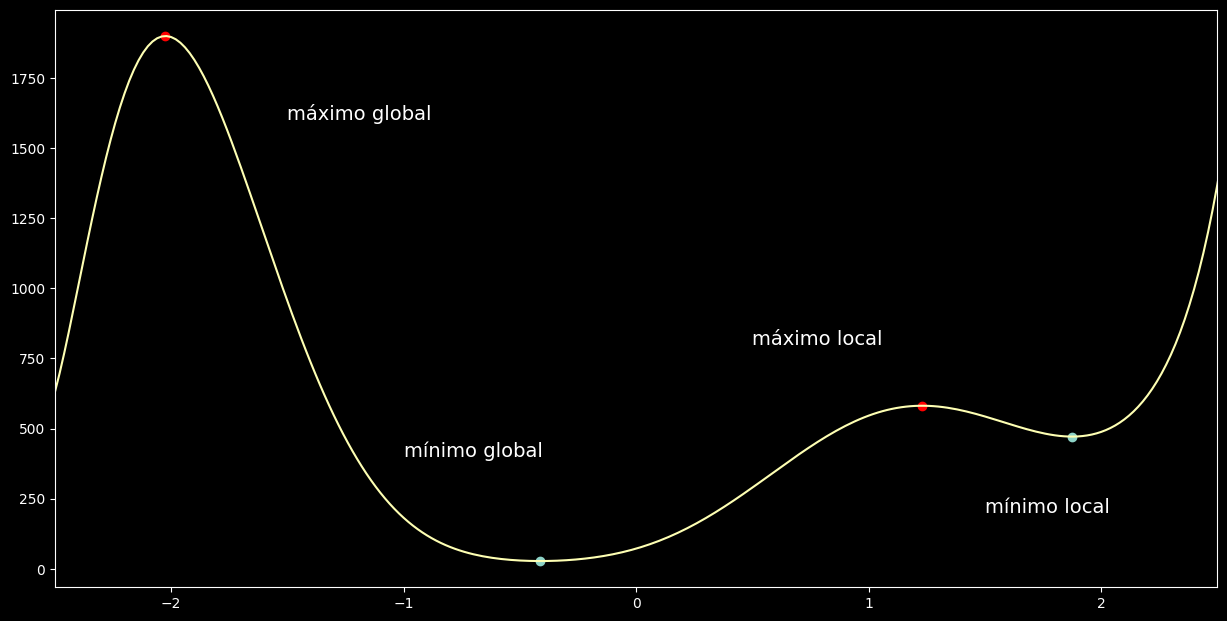

In [23]:
ig = plt.figure(figsize=(15,7.5))

x_max = r_crit[test<0]
y_max = polynomial(x_max)

x_min = r_crit[test>0]
y_min = polynomial(x_min)

#máximos
plt.plot(x_max, y_max, 'o', color='r')
plt.text(-1.5, 1600, 'máximo global', fontsize=14)
plt.text(0.5, 800, 'máximo local', fontsize=14)


# mínimos 
plt.plot(x_min, y_min, 'o')
plt.text(-1, 400, 'mínimo global', fontsize=14)
plt.text(1.5, 200, 'mínimo local', fontsize=14)

# funcion (tomando los valores de x entre -2.5 y 2.6 ya que entre ellos se encuentran los puntos criticos hallados)
xc = np.arange(-2.5, 2.6, 0.02)
yc = polynomial(xc)
plt.plot( xc, yc)
plt.xlim([-2.5,2.5])

<div style="text-align: justify; font-size: 1.1rem;">

Los valores máximos y mínimos caen como vemos dentro de dos categorías. 

- **locales**: son el valor máximo o mínimo en un subconjunto del dominio de la función.
- **globales**: son el valor máximo o mínimo en TODO el dominio de la función.

Es decir que en este caso para encontrar el valor máximo o mínimo de una función deberíamos calcular todos los puntos críticos $x_i$ evaluar $f$ para cada uno de ellos y seleccionar el máximo o mínimo de ellos según corresponda.

Esta definición es válida para tanto funciones univariables como multivariables. En la figura debajo se pueden observar estos extremos para un campo escalar de dos variables. 

<center>
<img src="https://blog.paperspace.com/content/images/2018/05/challenges-1.png">
</center>
</div>

## Puntos de inflexión

<div style="text-align: justify; font-size: 1.1rem;">

Hay otra clase de puntos críticos que se denominan puntos de inflexión. Son puntos en los cuales la derivada es cero pero no se corresponde con un máximo o con un mínimo. Para funciones de una variable esto es relativamente sencillo de observar en casos como por ejemplo 

$$
\color{orange}{f(x)=x^3}
$$
</div>

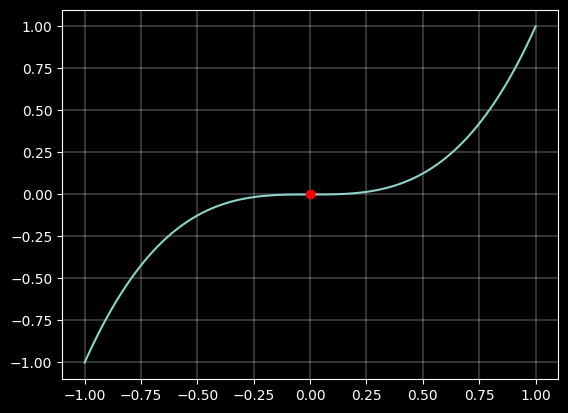

In [24]:
x_infl = np.linspace(-1,1,100)
y_infl = x_infl**3

plt.plot(x_infl,y_infl)
plt.plot(0, 0, "ro")
plt.grid(linewidth=0.3)
plt.show()

<div style="text-align: justify; font-size: 1.1rem;">

Para funciones de más de una variable este punto se lo suele llamar punto de ensilladura, traducción de *saddle point*. El gráfico debajo explica el por qué de la elección de este nombre. Este gráfico corresponde a 

$$
\color{orange}{f(x,y) = x^2 - y^2 }
$$
</div>

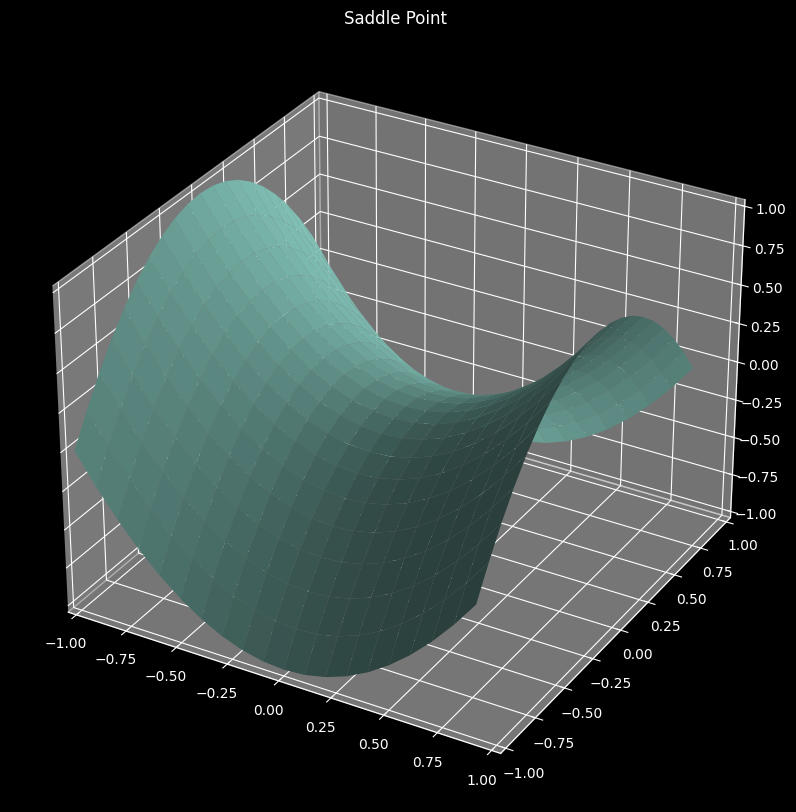

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_inf2, y_inf2 = np.mgrid[-1:1:0.1, -1:1:0.1]
z = x_inf2**2 - y_inf2**2

ax.view_init(azim=-60, elev=30)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.plot_surface(x_inf2, y_inf2, z)

plt.title("Saddle Point")
plt.show()

## Equivalencia entre hallar el máximo o el mínimo

<div style="text-align: justify; font-size: 1.1rem;">

Cualquier problema de máximización puede ser transformado a uno de minimización y viceversa. Esto es tan sencillo como multiplicar por $-1$ la **función objetivo** con la que estamos trabajando. Es decir que 

$$
\color{orange}{\underset{x}{\arg\max} \ f(x) = \underset{x}{\arg\min} \ {-f(x)}}  
$$
 
de la misma forma que 

$$
\color{orange}{\max f(x) = -\min(-f(x))}
$$

Es necesario también entender que lo que estamos viendo ahora es la **función de costo** para nuestro ejemplo la llamaré ignorancia, ya que es lo que queremos minimizar cuando estamos estudiando. 

La **función de costo** también se puede encontrar como **función de pérdida**, o **Loss Function**.

<hr>

Por otro lado, tener en cuenta que también existe esta otra transformación (pasamos de minimizar a maximizar), aunque la más utilizada es la primera:

$$
\color{pink}{\underset{x}{\arg\min} \ f(x) = \underset{x}{\arg\max} \ {-f(x)}}  
$$
 
de la misma forma que 

$$
\color{pink}{\min f(x) = -\max(-f(x))}
$$


En aprendizaje automático se suele usar minimización de una función de costo en vez de maximizar la recompensa, por más que sean equivalentes. Esto puede estar justificado por la amplia presencia de optimización convexa en la literatura de análisis numérico.
</div>

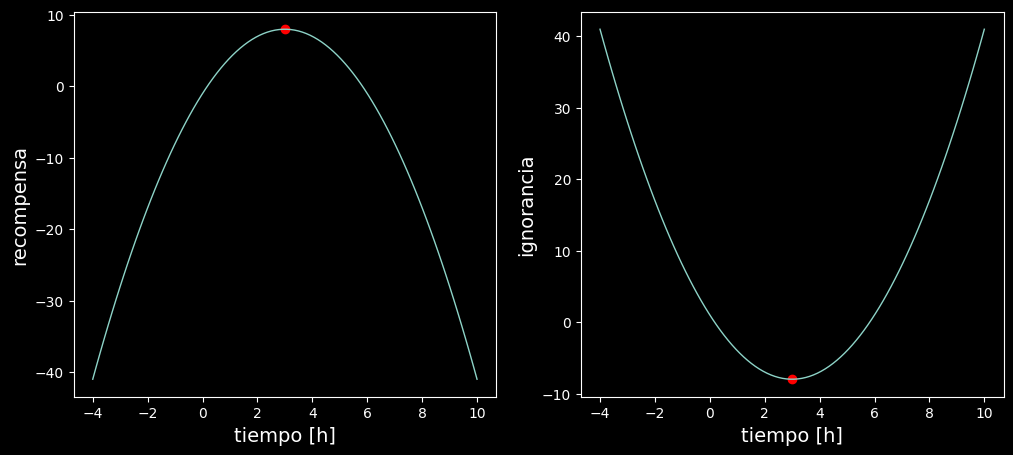

In [26]:
fig,ax = plt.subplots(ncols=2, figsize=(12,5))

# reward(t) -> nuestra funcion de mas arriba de la recompensa segun horas de estudio
_ = ax[0].plot(x_r,y_r,linewidth=1)
_ = ax[0].set_xlabel("tiempo [h]", fontsize=14)
_ = ax[0].set_ylabel("recompensa", fontsize=14)
_ = ax[0].scatter(3, reward(3), c='r')

# -reward(t) -> lo contrario de nuestra funcion de la recompensa segun horas de estudio
_ = ax[1].plot(x_r,-y_r,linewidth=1)
_ = ax[1].set_xlabel("tiempo [h]", fontsize=14)
_ = ax[1].set_ylabel("ignorancia", fontsize=14)
_ = ax[1].scatter(3, -reward(3), c='r')

## Optimización restringida

<div style="text-align: justify; font-size: 1.1rem;">

Ningún problema de optimización termina de estar definido si no se definen restricciones sobre el dominio. Esto es también natural, uno restringe el espacio de diseño para no estar inspeccionando soluciones que no queremos o no son reales para nuestro problema. Por ejemplo, con nuestro modelo de recompensa o ignorancia según las horas de estudio invertidas podríamos decir que: 

- horas negativas no cuentan, ya que no tienen mucho sentido
- horas mayores a 6 tampoco porque nuestra atención y concentración tiene límites

Las restricciones sobre la optimización son sobre el espacio de diseño, el dominio de nuestra función. Hay dos tipos de restricciones.

- restricciones de desigualdad
- restricciones de igualdad
</div>

### Restricciones de desigualdad

<div style="text-align: justify; font-size: 1.1rem;">
    
Las restricciones de desigualdad son las que mencionamos recién como ejemplo. Se llaman así porque las representamos como una desigualdad matemática. En el caso de las que propusimos esto consistiría en decir que 

$$
\color{orange}{g_1(x) \leq 0 \ \text{ donde } \ g_1(x) = x-5}
$$


$$
\color{orange}{g_2(x) \leq 0 \ \text{ donde } \ g_2(x) = -x}
$$

Lo primero sería que $x$ no puede ser mayor a 5 (hs de estudio)

Lo segundo que $x$ no puede ser menor a 0

esto lo escribimos así porque se suelen resumir en notación todas las restricciones de desigualdad de la siguiente forma 

$$
\color{orange}{g_{i}(x)\leq 0,\quad i=1,\dots ,m}
$$

donde $\color{orange}{m=2}$ en nuestro ejemplo.
</div>

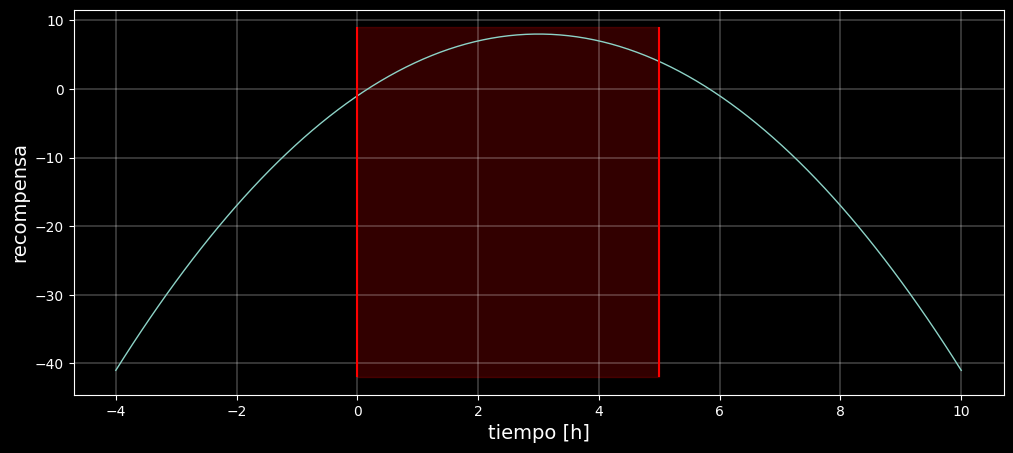

In [27]:
fig = plt.figure(figsize=(12,5))
plt.plot(x_r,y_r,linewidth=1)
plt.grid(linewidth=0.3)
plt.xlabel("tiempo [h]", fontsize=14)
plt.ylabel("recompensa", fontsize=14)

#restricciones de desigualdad

#g1
plt.vlines(0,ymin=min(y_r)-1, ymax= max(y_r)+1, color='r')

#g2
plt.vlines(5,ymin=min(y_r)-1, ymax= max(y_r)+1, color='r')

#fill
plt.fill_between([0,5], max(y_r)+1, min(y_r)-1, color='red', alpha=.2)

### Restricciones de igualdad

<div style="text-align: justify; font-size: 1.1rem;">

Estas restricciones se expresan como igualdades. Podríamos decir que solamente podemos estudiar una serie de posibles horarios, digamos 2 3 o 4 horas, es decir valores puntuales/discretos, no continuos. De modo que para encontrar el máximo solamente deberíamos evaluar las funciones en estos valores de tiempo. Las restriccinoes se escribirían de la siguiente manera

$$
\color{orange}{h_1(x) = 0 \ \text{ donde } \ h_1(x) = x-2 }
$$
$$
\color{orange}{h_2(x) = 0 \ \text{ donde } \ h_2(x) = x-3 }
$$
$$
\color{orange}{h_3(x) = 0 \ \text{ donde } \ h_3(x) = x-4 }
$$

de forma más compacta 

$$
\color{orange}{h_{j}(x) = 0,\quad i=1,\dots ,p}
$$

donde $\color{orange}{p=3}$ en nuestro ejemplo.


Para funciones de más de una variable las restricciones de igualdad necesitan de métodos más complejos para resolverlos analíticamente. Lo bueno es que no nos interesa, pero sepan que existen. Como ejemplo aquí debajo está la optimización restringida a una elipse de un campo escalar correspondiente a un paraboloide i.e. 

$$\color{orange}{z=x^2+y^2}$$


<a href="https://demonstrations.wolfram.com/ConstrainedOptimization/" > mas info</a>


Entonces ahora podemos escribir la formulación de un problema de optimización completo

$$\begin{aligned}&{\underset {x}{\operatorname {arg min} }}&&f(x)\\&\operatorname {sujeto\;a} &&g_{i}(x)\leq 0,\quad i=1,\dots ,m\\&&&h_{j}(x)=0,\quad j=1,\dots ,p\end{aligned}$$
</div>

## Métodos iterativos

<div style="text-align: justify; font-size: 1.1rem;">

Los métodos iterativos viven, son *creados* y estudiados dentro del mundo del **análisis numérico**. Para empezar a hablar de esto debemos hacer la distinción.

Nuestro universo se divide en dos ahora, **analítico** y **numérico**. 

</div>

### Soluciones Analíticas

<div style="text-align: justify; font-size: 1.1rem;">

La parte del universo de soluciones **analíticas** es un universo donde las soluciones a una ecuación se pueden escribir de forma **cerrada**. La solución en forma cerrada significa que podemos escribirla con operaciones matemáticas y funciones pertenecientes a un conjunto *aceptado* de las mismas, dando lugar a un resultado exacto, específico. Este conjunto aceptado no es igual para todas las disciplinas. A nosotros nos va a importar saber que nos referimos a las funciones típicas: exponenciales, potencias, funciones trigonométricas, entre otras. Una serie infinita no la consideraremos dentro de nuestro set. 

Miremos la siguiente ecuación 

$$\color{orange}{x^2 - 2 = 0}$$ 

podemos despejar $\color{orange}{x}$ sencillamente 

$$
\color{orange}{x = \pm \sqrt{2}}
$$

es decir que tenemos todos los recursos a mano para definir la solución usando una función aceptadisima como ser la raíz cuadrada. Miremos esta otra

$$
\color{orange}{x^6-4x^5+\sin (x)-e^x+7-\frac{1}{x} =0}
$$

esta ecuación no tiene solución en forma cerrada, es decir no podemos usar funciones *convencionales* para despejar $x$. Aquí es donde nos es muy útil el análisis numérico. Existen también situaciones en las cuales si bien podemos escribir algo en forma cerrada es muy lento calcularlo de esa manera con el hardware disponible, y las alternativas numéricas aportan mayor sencillez.

</div>

### Soluciones Numéricas

<div style="text-align: justify; font-size: 1.1rem;">

En la otra cara de esta moneda, la numérica, lo que hacemos siempre son aproximaciones a la solución. Es importante recordar aquí que las computadoras no saben lo que es un número real. Por ejemplo, un caso de aproximación es el número $\color{orange}{\pi}$. Por más que felizmente escribamos `np.pi` para usar $\color{orange}{\pi}$, la representación en hardware, en memoria, es de un número racional que **aproxima** con una cantidad altísima de decimales a $\color{orange}{\pi}$, lo mismo vale para la raíz cuadrada calculada anteriormente. 

Los métodos numéricos son el mejor amigo de la compu.
    
Un caso de solución numérica para encontrar, por ejemplo, las raíces de una ecuación es la del **Método de la bisección**. Dicho método consiste básicamente en iterar/repetir un conjunto de pasos $n$ veces hasta llegar a un punto donde obtenemos a un resultado **aproximado** a la solución de nuestra ecuación y que consideramos aceptable. De allí que el método de la bisección sea a su vez un método iterativo.

A continuación, se mostrará un ejemplo de dicho método de una función **creciente**, con apuntes desarrollados a partir de la explicación de este video:


<a href="https://www.youtube.com/watch?v=mdG6gpzE54k" target="blank_">Ejemplo método de la bisección</a>

</div>

![Met. biseccion 1](./images/Optimizacion-parte1.png)

![Met. biseccion 2](./images/Optimizacion-parte2.png)

![Met. biseccion 3](./images/Optimizacion-parte3.png)

![Met. biseccion 4](./images/Optimizacion-parte4.png)

![Met. biseccion 5](./images/Optimizacion-parte5.png)

![Met. biseccion 6](./images/Optimizacion-parte6.png)

![Met. biseccion 7](./images/Optimizacion-parte7.png)

![Met. biseccion 8](./images/Optimizacion-parte8.png)

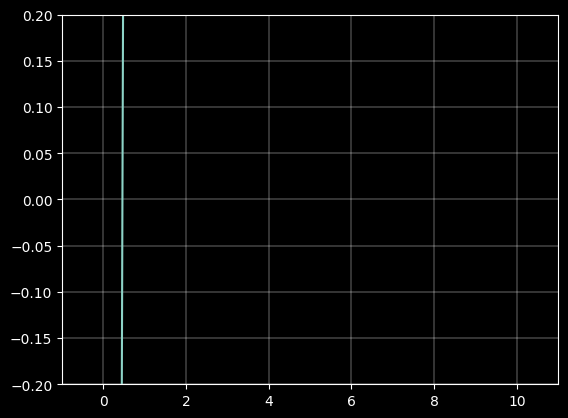

In [28]:
x_n_example = np.linspace(-1,10,100)
y_n_example = np.exp(3 * x_n_example) - 4

plt.plot(x_n_example,y_n_example)

plt.xlim(-1, 11)
plt.ylim(-0.2, 0.2)

plt.grid(linewidth=0.3)

plt.show()

<div style="text-align: justify; font-size: 1.1rem;">

A continuación, se muestra un ejemplo más con el método de la bisección, extraído (al igual que gran parte del material de este notebook) del documento de esta clase de Humai:

Digamos que tenemos que encontrar el punto donde una recta corta al eje x. Definimos a esta recta como 

$$
\color{orange}{f(x) = y = x - 5}
$$
    
Entonces necesitamos obtener la solución a
    
$$
\color{orange}{0 = x-5}
$$

</div>

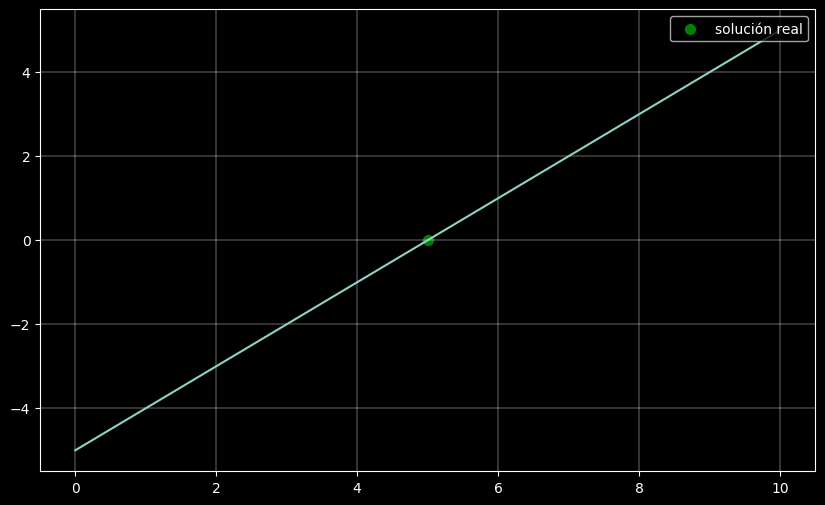

In [29]:
x_n = np.linspace(0,10,100)
y_n = x_n-5

plt.figure(figsize=(10,6))
plt.plot(x_n,y_n)
plt.grid(linewidth=0.3)

plt.scatter(5, 0, color='green', s=50, label="solución real")

plt.legend(loc=1)

plt.show()

<div style="text-align: justify; font-size: 1.1rem;">

Por más sencillo que parezca que la solución es $5$, hagamos de cuenta que baja Dios del cielo y nos dice que no podemos sumar $5$ de ambos lados de la ecuación para despejar el resultado. Nos dice que tenemos que usar un método numérico si o si. Como somos muy creyentes le decimos ok.


Entonces, una manera sería la siguiente, agarramos un intervalo $\color{orange}{[a_0,b_0]}$ donde sabemos que $\color{orange}{f(a_0)<0}$ y $\color{orange}{f(b_0)>0}$ (esto se da porque la función que estamos viendo es creciente, caso contrario sería al revés) por ejemplo 

$$
\color{orange}{[a_0,b_0]=[3,8]}
$$

Los escribimos con subíndice porque vamos a ir cambiando estos valores en el proceso. Ahora calculemos para ambos puntos


$$
\color{orange}{f(a_0) = -2 \quad f(b_0)= 3 }
$$
    
Genial, elegimos bien. Ahora calculemos el punto medio de nuestro intervalo $\color{orange}{\frac{a_0+b_0}{2} = 5.5}$ y calculemos el valor de la función en ese punto


$$
\color{orange}{f(\frac{a_0+b_0}{2}) = f(5.5) = 0.5}
$$


</div>

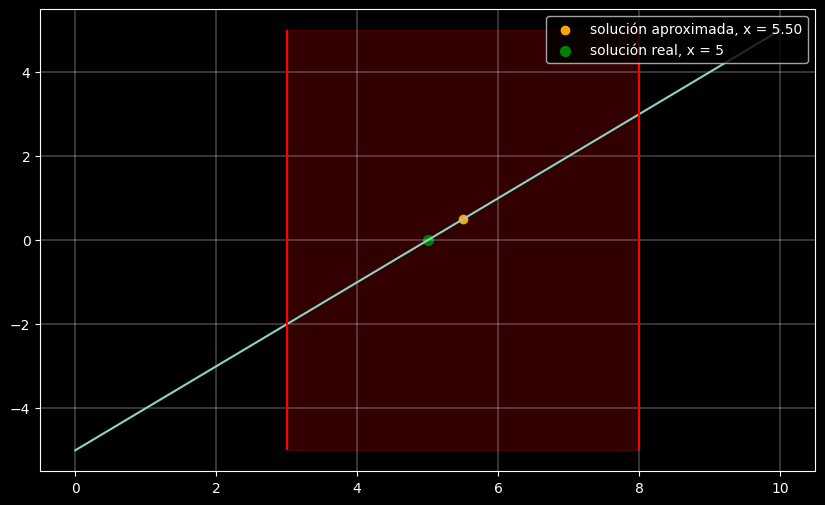

In [30]:
a = 3
b = 8

plt.figure(figsize=(10,6))
plt.plot(x_n,y_n)
plt.grid(linewidth=0.3)

plt.vlines(a, min(y_n), max(y_n), color='r')
plt.vlines(b, min(y_n), max(y_n), color='r')
plt.fill_between([a,b], min(y_n), max(y_n), color='r', alpha=0.2)

midpoint = (a+b)/2
plt.scatter(midpoint, midpoint-5, color='orange', label=f"solución aproximada, x = {midpoint:.2f}")

plt.scatter(5, 0, color='green', s=50, label=f"solución real, x = {5}")

plt.legend(loc=1)
plt.show()

<div style="text-align: justify; font-size: 1.1rem;">

Como este valor es mayor a cero redefinamos, ahora $\color{orange}{b_1}$ será igual a $\color{orange}{5.5}$ dejando el intervalo como 

$$
\color{orange}{[a_1,b_1]=[3,5.5]}
$$

Volvamos a calcular el punto medio de este intervalo $\color{orange}{\frac{a_1+b_1}{2} = 4.25}$ y calculemos $\color{orange}{f}$


$$
\color{orange}{f(\frac{a_1+b_1}{2}) = f(4.25) = -0.75}
$$

</div>

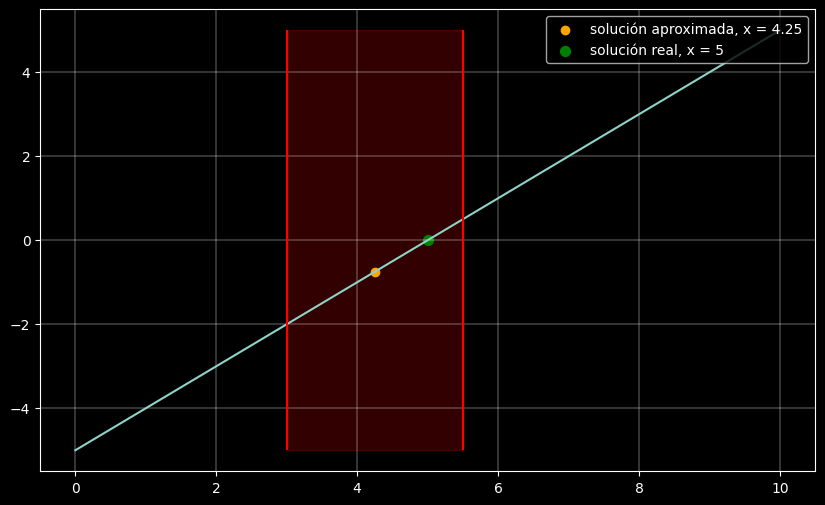

In [31]:
a = 3
b = 5.5

plt.figure(figsize=(10,6))
plt.plot(x_n,y_n)
plt.grid(linewidth=0.3)

plt.vlines(a, min(y_n), max(y_n), color='r')
plt.vlines(b, min(y_n), max(y_n), color='r')
plt.fill_between([a,b], min(y_n), max(y_n), color='r', alpha=0.2)

midpoint = (a+b)/2
plt.scatter(midpoint, midpoint-5, color='orange', label=f"solución aproximada, x = {midpoint:.2f}")
plt.scatter(5, 0, color='green', s=50, label=f"solución real, x = {5}")
plt.legend(loc=1)

plt.show()

<div style="text-align: justify; font-size: 1.1rem;">

Repetimos el proceso pero ahora debemos cambiar $\color{orange}{a}$ y no $\color{orange}{b}$, dejando así 


$$
\color{orange}{[a_2,b_2]=[4.25,5.5]}
$$

Calculamos nuevamente el punto medio de nuestro intervalo


$$
\color{orange}{\frac{a_2+b_2}{2}=4.875}
$$ 


donde 


$$
\color{orange}{f(4.875) = -0.125}
$$


</div>

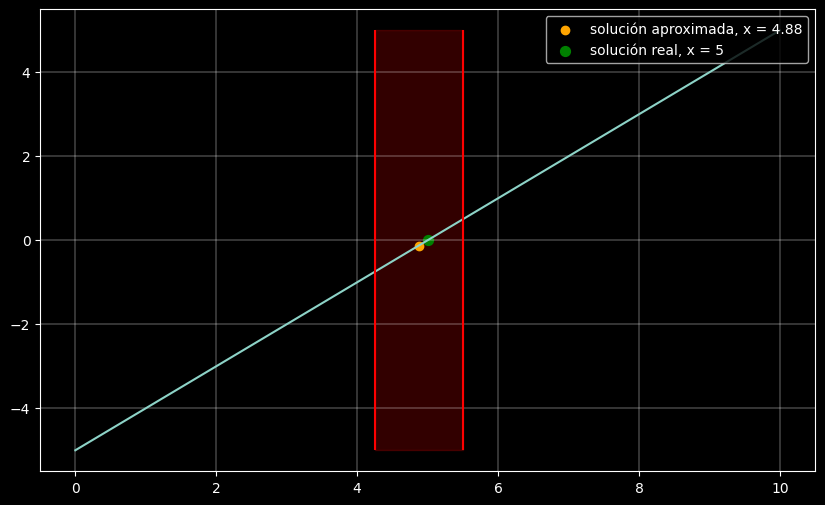

In [32]:
a = 4.25
b = 5.5

plt.figure(figsize=(10,6))
plt.plot(x_n,y_n)
plt.grid(linewidth=0.3)

plt.vlines(a, min(y_n), max(y_n), color='r')
plt.vlines(b, min(y_n), max(y_n), color='r')
plt.fill_between([a,b], min(y_n), max(y_n), color='r', alpha=0.2)

midpoint = (a+b)/2
plt.scatter(midpoint, midpoint-5, color='orange', label=f"solución aproximada, x = {midpoint:.2f}")
plt.scatter(5, 0, color='green', s=50, label=f"solución real, x = {5}")
plt.legend(loc=1)

plt.show()

<div style="text-align: justify; font-size: 1.1rem;">

como el valor es negativo este será nuestro nuevo punto $\color{orange}{a_3=4.875}$ dejando al intervalo como 

$$\color{orange}{[a_3,b_3]=[4.875, 5.5]}$$

donde el punto medio es nuestra aproximación final del valor que queremos hallar

$$
\color{orange}{x \approx \frac{a_3+b_3}{2}= 5,1875}
$$
 
nada mal. 

</div>

#### Método de la bisección

<div style="text-align: justify; font-size: 1.1rem;">

El método que *inventamos* se llama método de la bisección y es uno de los ejemplos más sencillos. Entonces el método iterativo quedaría definido con la siguiente serie de pasos. 

1. Elegir un intervalo $\color{orange}{[a_0,b_0]}$ donde los valores de $f$ en los extremos sean negativo y positivo.
2. Calcular punto medio. 
3. Evaluar $\color{orange}{f}$ en el punto medio $\color{orange}{\frac{a+b}{2}}$. 
    - si es positivo redefinir $\color{orange}{b_{i+1} = \frac{a_i+b_i}{2}} $ 
    - si es negativo redefinir $\color{orange}{a_{i+1} = \frac{a_i+b_i}{2}}$
4. Debemos parar? 
    - caso afirmativo devolver el último punto medio calculado
    - caso negativo repetir desde 1
    

Aquí la pregunta que se desprende es cuándo parar? En los métodos iterativos se suelen tomar dos criterios en casi todos los problemas. 

- **Número de iteraciones** o Máximas iteraciones: Como el proceso es iterativo podemos predefinir cuándo queremos parar. El lado positivo de este criterio es que ya sabemos de antemano cuanto tiempo va a correr nuestro algoritmo, ya que tiene un fin bien marcado. Por otro lado tiene como contra que no sabemos si el valor que reporte será satisfactorio. Los valores de los métodos numéricos muchas veces dependen de las condiciones iniciales, en nuestro ejemplo esto sería el intervalo inicial $[a_0, b_0]$. 
- **Tolerancia**. La tolerancia se refiere al error mínimo aceptado. Pero nos preguntamos, si no sabemos la solución real como podemos calcular el error. Acá hay una trampita en llamarle error. 

  Si el resultado que buscamos es $x$ y el valor para el paso i-ésimo de nuestro método iterativo es $x_i$ definimos a este error como 
  $$
  \color{orange}{e_i = |x_i - x_{i-1}|}
  $$
  
  entonces el criterio de la tolerancia nos pide definir una tolerancia $TOL$ tal que si 
  
  $$
  \color{orange}{e_i\leq TOL}
  $$
  
  paramos el algoritmo. Esto es bueno ya que podremos seleccionar la precisión con la que queremos el resultado. Asimismo no hay garantía sobre el tiempo de ejecución ya que podría ser una solución que converga muy lento y estemos esperando años frente al monitor. 
  
Por los motivos expuestos se suelen usar los dos métodos en simultáneo. 
</div>

### Gradiente Descendiente

<div style="text-align: justify; font-size: 1.1rem;">
    
La mayoría de los algoritmos de Aprendizaje Automático involucra alguna optimización. Como venimos diciendo la mayoría de los problemas se enmarcan en minimizar una función. Esta función a minimizar la llamamos función de costo, de pérdida o error. 

$$\color{orange}{x^* = \underset{x}{arg \ min} \  f(x)}$$

En los problemas de ML en particular muchas veces no existe manera de resolver un problema de manera analítica de modo que necesitaremos utilizar algún método iterativo. El entrenamiento de una red neuronal es materializado por un proceso de optimización de una función de costo, o pérdida, i.e. minimización. 

Cuál es esa función de costo y qué impacto tiene su elección en el resultado del entrenamiento, escapa el alcance de esta clase. No obstante es importantísimo destacar que el **aprendizaje** queda condensado en la optimización!

Volvamos al ejemplo de nuestra función **ignorancia** sobre un tema de estudio en función del tiempo. Digamos que tenemos que minimizarla, sin restricciones algunas, ni de desigualdad ni igualdad. También tengamos en cuenta que no usaremos para este caso métodos analíticos, sino una solución numérica por medio de iteraciones.

Recordemos que la derivada (en funciones univariables) nos da información sobre la pendiente de la recta tangente de la gráfica. Es decir que cuando la función decrezca la pendiente de esa recta será negativa, caso contrario será positiva. En los extremos ya vimos que será cero. Entonces la derivada nos especifica cómo se traduce en la función un cambio pequeño en el input ($x$, valor dentro del espacio de diseño). Como todo buen método iterativo tenemos que elegir un valor inicial, que será nuestro $x_0$.

- Si $\color{orange}{f^{'}(x_0) > 0}$  avanzar en dirección creciente del eje x nos lleva a valores más altos. Queremos ir entonces en la dirección decreciente, justamente porque al minimizar queremos encontrar el mínimo de la función. En este caso iremos hacia la "izquierda" en el eje $x$.
- Si $\color{orange}{f^{'}(x_0) < 0}$ avanzar en dirección creciente del eje x nos lleva a valores más bajos. Queremos ir entonces en la dirección creciente, es decir hacia la "derecha" en el eje $x$.
</div>

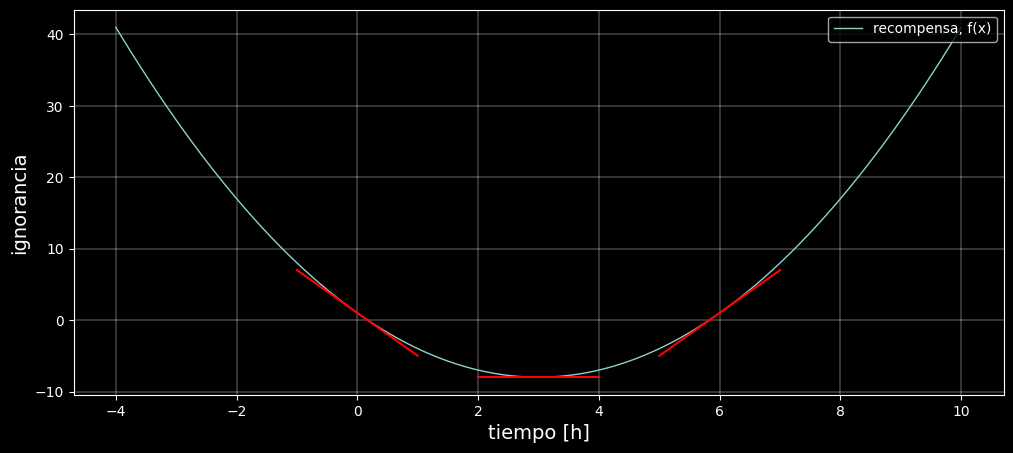

In [36]:
fig = plt.figure(figsize=(12,5))
plt.plot(x_r,-y_r,linewidth=1, label="recompensa, f(x)")
plt.xlabel("tiempo [h]", fontsize=14)
plt.ylabel("ignorancia", fontsize=14)
plt.grid(linewidth=0.3)
plt.legend(loc=1)

x_test = np.array([0,3,6])
slopes = -deriv_reward_for_numpy(x_test)
rewards = -reward(x_test)


xx = np.linspace(-1,1,50)
for x_t,s,r in zip(x_test, slopes, rewards):
    plt.plot(x_t+xx, s*xx+r, c='r',)

<div style="text-align: justify; font-size: 1.1rem;">
Entonces siempre queremos ir en dirección con el signo opuesto a la derivada. Es decir

- Si $\color{orange}{f^{'}(x_0) > 0 \implies  x_1<x_0}$
- Si $\color{orange}{f^{'}(x_0) < 0 \implies  x_1>x_0}$ 

donde $x_1$ es el segundo valor de $x$ (o sea, en la iteración número 2) que hallamos con nuestro método iterativo. Tenemos que elegir ahora cuanto avanzamos en $x$. Una posibilidad sería avanzar una distancia fija, como por ejemplo $1$. Esto tiene un problema. Si avanzamos una distancia fija vamos a estar haciendo saltos de distancia $1$, es decir limitamos nuestro espacio de búsqueda a 

$$\color{orange}{x_1 = x_0 + c \quad c\in\mathbb{N}}$$   

No nos sirve. Recordemos que nosotros tenemos información sobre cuanto cambia la función en un pequeño intervalo de $x$ con el valor de la derivada. Es decir, si la derivada es grande significa que tenemos enfrente una caída/subida pronunciada, tiene sentido avanzar un paso grande. Podemos escribir entonces el método iterativo de gradiente descendiente (se llama de gradiente porque se suele utilizar con funciones de más de una variable pero claramente es aplicable a funciones univariables como esta). 

$$\color{orange}{x_{i+1} = x_i - \epsilon f^{'}(x_i)}$$

donde 
- $\color{orange}{x_{i+1}}$ es el valor de $\color{orange}{x}$ en el próximo paso iterativo 
- $\color{orange}{x_i}$ el valor de $\color{orange}{x}$ en el paso actual $\color{orange}{i}$
- $\color{orange}{f^{'}(x_i)}$ el valor de la derivada en el paso iterativo actual $\color{orange}{i}$
- $\color{orange}{\epsilon}$ **learning rate** o ritmo de aprendizaje

Es decir, en función de esta teoría, tenemos los siguientes elementos a utilizar para aplicar el algoritmo del gradiente descendiente, que recalquemos, es un algoritmo para encontrar un mínimo de una función de manera numérica, es decir, con iteraciones.
Los elementos son:
- La función en sí con la que vamos a trabajar para hallar sus mínimos
- La derivada de la función (si la función es univariable, será una función derivada)
- Un valor inicial aleatorio $x_0$
- Un ritmo de aprendizaje, que por lo general tomará valores entre 0 y 1. Este valor indica qué tanto se avanzará en los distintos valores sucesivos de $x$ en este caso que se tomen hasta hallar el mínimo (o lo más cercano al mínimo)
- Una cantidad de iteraciones. Tener en cuenta que cuanto mayor sea la cantidad de iteraciones, tendremos que acercar un poco más del ritmo de aprendizaje a 1 para que no avance tan lento. Y si es menor la cantidad de iteraciones, menor entonces deberá ser el ritmo de aprendizaje para ser más "cuidadosos" en los pasos que se van dando y no pasarnos del otro lado con valores muy grandes, aunque esto depende del modelo que queramos entrenar.
- Tolerancia para que, llegado a un cierto punto, si ya estamos satisfechos con cierto margen de error, aunque las iteraciones no hayan concluido, cortar allí y quedarnos con ese resultado.

Por otro lado, tener en cuenta que decidir qué valor de $x_0$, o de ritmo de aprendizaje, o de iteraciones o de tolerancia tomar, es un proceso de optimización en sí mismo también, ya que la elección de estos repercutirá en el buen funcionamiento del algoritmo del gradiente descendiente. Sin embargo, eso no se verá en esta clase.

</div>

In [43]:
# implementación de metodo iterativo de gradiente descendiente para la función ignorancia
# tener en cuenta que en Pyton 1e representa el 10. Y colocar 1e-2 seria lo mismo que 10 a la -2, mientras que 1e+2 es 10 a la 2

deriv_ignorance = lambda x: -deriv_reward_for_numpy(x)

def descend_grad(x_0, grad, lr=1e-2, MAXITER=1e+3, TOL=1e-4):
    x_i = x_0
    for _ in range(int(MAXITER)):
        x_i_1 = x_i - grad(x_i)*lr
        
        if abs(x_i_1-x_i) < TOL:
            return x_i_1            
        x_i = x_i_1
 
    return x_i

x_0 = -15
x_minimum = descend_grad(x_0, deriv_ignorance, lr=1e-2, MAXITER=1e+3)
print(x_minimum) # nos da 2.99... lo cual se acerca bastante al valor 3 del mínimo en x

2.995166237457812


<div style="text-align: justify; font-size: 1.1rem;">
Como se dijo antes, la pregunta de cómo elegir precisamente el learning rate o la cantidad máxima de iteraciones es una labor de optimización DIFERENTE a la de optimización propia de la función (o red) y es un mundo aparte, pero tengan en cuenta que existe y que los mismos principios generales reinan allí también. 

Es importante mencionar que:

- un valor muy pequeño de $\color{orange}{\epsilon}$ va a tardar mucho en aprender
- un valor muy grande de $\color{orange}{\epsilon}$ podría llegar a tener comportamientos divergentes, evitando el mínimo básicamente por pegar saltos muy grandes.

<center>
<img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png">
</center>

</div>

### Ejemplo aplicación gradiente descendiente: Cuadrados mínimos

<div style="text-align: justify; font-size: 1.1rem;">
Recordamos que cuadrados mínimos trata el problema de ajustar una recta que minimize el valor del cuadrado total de los errores entre las variables observadas y las predicciones. El modelo que planteamos es 

$$\color{orange}{ \boldsymbol{\hat{y}} = \boldsymbol{\beta_0} + \boldsymbol{\beta_1 x}}$$


$$\color{orange}{ \boldsymbol{e} = \boldsymbol{y}-\boldsymbol{\hat{y}}}$$
$$\color{orange}{ e = \sum_{i=1}^{m}\boldsymbol{e}_{i}^2}$$

donde $\color{orange}{x}$ son las variables independientes, $\color{orange}{\boldsymbol{y}}$ las variables observadas,  $\color{orange}{\boldsymbol{\hat{y}}}$ las variables predecidas por el modelo

Tener en cuenta que la primer $e$ es el vector de errores (cada componente es la diferencia $y_n - \hat{y_n}$), mientras que el sergundo $e$ es un número que representa la suma de los cuadrados de dichos errores

</div>

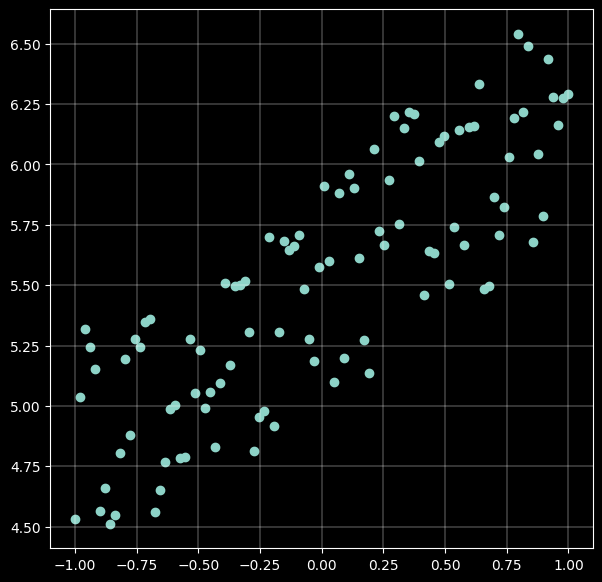

In [45]:
b0_true = 5 # asumimos que el valor de b0 que queremos encontrar es este
b1_true = 0.7 # asumimos que el valor de b1 que queremos encontrar es este
x_rl = np.linspace(-1,1,100)
y_rl = x_rl*b1_true + b0_true + np.random.random(x_rl.shape) # esto último son errores aleatorios que agregamos a estas observaciones "reales" mockeadas que armamos

fig = plt.figure(figsize=(7,7))
_ = plt.scatter(x_rl,y_rl)
_ = plt.grid(linewidth=0.3)

<div style="text-align: justify; font-size: 1.1rem;">
    
Vimos que existe una fórmula cerrada, analítica, para hallar los pesos $b_0, b_1$ que minimizan el error cuadrático medio. Vamos a reciclar esa solución para comparar con el método del gradiente descendiente. 


$$\color{orange}{\beta_1 = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}}$$

$$\color{orange}{\beta_0 = \bar{y} - \beta_1\bar{x}}$$
</div>

In [46]:
b1_num = (x_rl - x_rl.mean()).dot(y_rl - y_rl.mean())
b1_den = (x_rl - x_rl.mean()).dot(x_rl - x_rl.mean())
b1 = b1_num/b1_den
b0 = y_rl.mean() - b1*x_rl.mean()
print(f"β₀= {b0:.3f}, β₁= {b1:.3f}")

β₀= 5.511, β₁= 0.735


<div style="text-align: justify; font-size: 1.1rem;">
    
Nosotros queremos minimizar nuestra función de costo, es decir, hallar por medio del gradiente descendiente en este caso los valores de $b_0$ y $b_1$ que harán que el error sea el mínimo. Entonces, como ya vimos que lo primero que necesitamos para aplicar este algoritmo del gradiente descendiente es una función a la que le queremos hallar el mínimo, esa función aquí será el promedio de los errores, también conocida como $\color{orange}{MSE}$:

$$\color{orange}{e=\frac{1}{m}\sum_{i=1}^{m}\boldsymbol{e}_{i}^2}$$ 

Tener en cuenta que $m$ hace referencia al número de puntos.
Por otro lado, recordar que:
$$\color{orange}{e=y - \hat{y}}$$
$$\color{orange}{\hat{y}=b_0 + b_1 . x}$$
Entonces
$$\color{orange}{e=y - (b_0 + b_1 . x)}$$
$$\color{orange}{e=y - b_0 - b_1 . x}$$

Siendo $y$ el vector de las observaciones reales, mientras que $\hat{y}$ es el vector de las predicciones, y $x$ es el vector de las variables independientes.

Las variables que queremos optimizar son $\color{orange}{\beta_0}$ y $\color{orange}{\beta_1}$. Entonces $\color{orange}{e(\beta_0, \beta_1)}$. Debemos calcular el gradiente de esta función de costo. Esto es por un lado, la derivada parcial de la función respecto de $b_0$, y por el otro la derivada parcial de la función respecto de $b_1$:

$$
\color{orange}{\nabla e = \left( \frac{\partial e}{\partial \beta_0} , \frac{\partial e}{\partial \beta_1} \right)}
$$

Ambas derivadas nos darían de la siguiente forma:

$$
\color{orange}{\frac{\partial e}{\partial \beta_0}=  \frac{\partial}{\partial \beta_0} \frac{1}{m} \sum_{i=1}^{m}\left(y_i- \beta_0 - \beta_1 x_i\right)^2 =  \frac{-2}{m}\sum_{i=1}^{m}\left(y_i- \beta_0 - \beta_1 x_i\right)= \frac{-2}{m} \sum_{i=1}^{m}e_i}
$$

y 

$$
\color{orange}{\frac{\partial e}{\partial \beta_1}=  \frac{\partial}{\partial \beta_1} \frac{1}{m}\sum_{i=1}^{m}\left(y_i- \beta_0 - \beta_1 x_i\right)^2 = \frac{-2}{m}\sum_{i=1}^{m}\left(y_i- \beta_0 - \beta_1 x_i\right)x_i = \frac{-2}{m} \sum_{i=1}^{m}e_i x_i}
$$

Teniendo esto en cuenta, definamos entonces el gradiente (nuestro método optimizador) y realizemos la regresión lineal con el método iterativo. 
El resultado final lo compararemos con lo que obtuvimos más arriba con la manera analítica para ver si llegamos a la misma conclusión.
</div>

In [50]:
class GradientDescent:
        
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        
        """
        Inicializador de la clase que usaremos para aplicar el gradiente descendiente y obtener el mínimo
        
        Parámetros
        ----------
        learning_rate (float, opcional): Ritmo de aprendizaje. Default a .001
        max_iters (int, opcional): Máximas iteraciones. Default a 1E4.
        epsilon (float, opcional): Cóta mínimma para el valor del gradiente permitido. Default a 1E-8
        record_history (bool, opcional): Si es True guarda el historial de los pesos para cada paso de iteración. Default a False
        """
        
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 
            
    def run(self, gradient_fn, x, y, w):
        """
        Método iterativo de gradiente descendiente. 
        
        Parámetros
        ----------
        gradient_fn (function): gradiente de la función costo a minimizar. Debe tomar como parámetros x,y y los pesos correspondientes.
        x (numpy.ndarray): variables independientes del conjunto de datos.
        y (numpy.ndarray): variables dependientes observadas
        w (numpy.ndarray): variables a entrenar del modelo, en este caso son b0 y b1

        Devuelve
        --------
            w (numpy.ndarray): variables resultantes luego del proceso de entrenamiento.
        """
        
        grad = np.inf # definimos el valor del gradiente como infinito inicialmente para que se cumpla la condicion y se ingresse al while
        # np.inf es una constante de Numpy para representar un número muuuy grande (hacia el infinito)
        # grad para este caso básicamente va a ser el resultado de nuestro vector gradiente de la funcion de error
        
        t = 1 # contador
        
        #linalg.norm calcula la norma del vector gradiente
        # si la norma del vector gradiente es mayor de la cota que establecimos, y si aun quedan iteraciones, se realiza una nueva iteracion
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters: 
            grad = gradient_fn(x, y, w) #calculamos el valor del gradiente               
            w = w - self.learning_rate * grad #IMPORTANTE: esta es la formula vista mas arriba del gradiente descendiente        
            if self.record_history: 
                self.w_history.append(w) # guardar los valores es para hacer graficos despues para ver como fue avanzando en cada paso
            t += 1
        return w # retorna el valor una vez que o ya se terminaron las iteraciones o la norma del vector gradiente ya es menor que la cota establecida


<div style="text-align: justify; font-size: 1.1rem;">
Acá lo que hicimos fue definir una clase que utilizaremos como optimizador. Introduciremos también un nuevo criterio para detener el proceso de aprendizaje. Este se corresponde con elegir una cota mínima al valor del gradiente. Es decir si

$$
\color{orange}{\nabla f < \varepsilon}
$$

detenemos la iteracion. Asimismo agregamos un record de la historia del proceso para poder hacer gráficas lindas después. El método iterativo en cuestión ya lo hemos definido con mucho detalle. La única diferencia es que ahora en caso de querer guardar los pesos historicos debemos generar un atributo de la clase que sea una lista en donde se almacenen los datos deseados.

Ahora definimos la clase con la que vamos a obtener el modelo que deseamos optimizar. En este caso la regresión lineal, que utlizará como algoritmo de optimización la clase del gradiente descendiente propia que se desarrolló más arriba.
Cuando obtengamos nuestro modelo a través de esta clase, primero inicializaremos LinearRegression(). Luego, llamaremos al método fit(), que devolverá los betas ($b_0$ y $b_1$ en este caso) que buscamos optimizar, y finalmente para hacer una prueba de predicción, llamaremos al método predict().

Esto es básicamente una implementación propia de LinearRegression() de ScikitLearn, solo que esto nos sirve para concer internamente cómo realiza el entrenamiento del modelo para obtener el valor de los parámetros con el menor error posible automáticamente.
</div>

In [55]:
class LinearRegression:
    def __init__(self, add_bias=True):
        #el bias es la constante de nuestro modelo lineal. Si estuviera en False, quiere decir que nuestro modelo no tiene constante b0 (ord. al origen)
        self.add_bias = add_bias 
        pass
            
    def fit(self, x, y, optimizer):
        """
        Función de entrenamiento para la regresión lineal
        
        Parámetros
        ----------
        x (numpy.ndarray): variables independientes del conjunto de datos.
        y (numpy.ndarray): variables dependientes observadas
        optimizer: optimizador que implemente el método del gradiente descendiente 
            que tenga implementado un método run(gradient,x,y,w), ya que sino no funcionaria

        """
        # si el modelo tiene la constante b0, al array de las variables independientes x debemos agregarle una columna de 1 que representaran esta otra constante a encontrar aparte del coeficiente que acompaña a las x
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)]) 
        
        N,D = x.shape # obtenemos la cant de filas y columnas de x (matriz que ahora tiene la columna de 1 y la columna de variables x)
        
        def gradient(x, y, betas):                          
            yh =  x @ betas # la operación calcula el producto matricial de x con la matriz de betas, y asi obtenemos nuestro vector y_sombrero de predicciones
            N, D = x.shape # N es la cantidad de puntos
            """Tener en cuenta que aca y - yh (que nos da el vector de error) es un array unidimensional (N filas, 1 columna)
            mientras que x, si existe un bias, es una matriz de N filas x 2 columnas (1 columna de unos para b0 y una columna de x).
            Intuyo que Numpy lo que debe hacer en este caso con dot es obtener un vector con dos componentes en cada iteracion.
            El primer componente multiplica el vector y-yh con el vector de 1 (columna de b0 de la matrix x)
            El segundo componente multiplica el vector y-yh con el vector de las x de la matriz x
            en cada iteracion va a ir cambiando este vector obviamente porque los betas van cambiando hasta encontrar los betas optimos"""
            grad = -2*np.dot(y-yh, x)/N # ver mas arriba el gradiente de la funcion de error para tener una mejor idea
            return grad
        
        betas0 = np.zeros(D) #betas iniciales, serian b0 (ord al origen) y b1 (coeficiente de x), a las que se les da un valor inicial de cero y se las coloca en una matriz de 2 x 1                              
        # Si no hubiera constante b0 en el modelo, solo se buscaria el valor optimo de b1
        self.betas = optimizer.run(gradient, x, y, betas0) #corremos el optimizador  
        return self
    
    def predict(self, x):
        """
        Cálculo de las predicciones para x de entrenamiento
        
        Parámetros
        ----------
        x (numpy.ndarray): variables independientes del conjunto de entrenamiento
        
        Devuelve
        --------
        yh (numpy.ndarray): predicciones con el modelo entrenado
        
        """
        
        if self.add_bias: 
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.betas
        return yh

<div style="text-align: justify; font-size: 1.1rem;">
Función que entrena a nuestro modelo. En caso de necesitar un bias casi (siempre lo queremos) agregamos una columna de unos a nuestros datos para poder vectorizar las operaciones. Definimos al gradiente como la función que despejamos anteriormente y redefinimos el mismo vectorizando la operación como un producto matricial. 

$$
\color{orange}{\frac{\partial e}{\partial \beta_0}= \frac{-2}{m} \sum_{i=1}^{m}e_i = \frac{-2}{m} \ ( \boldsymbol{e} \cdot  \vec{1})}
$$

y 


$$
\color{orange}{\frac{\partial e}{\partial \beta_1}=\frac{-2}{m} \sum_{i=1}^{m}e_i x_i =  \frac{-2}{m} \ (\boldsymbol{e} \cdot \boldsymbol{x})}
$$

Corramos ahora el optimizador grafiquemos la evolución del modelo. Esta evolución la podemos ver materializada en las rectas aproximadas en cada uno de los pasos.   
</div>

Valor de b0 encontrado: 5.51
Valor de b1 encontrado: 0.71


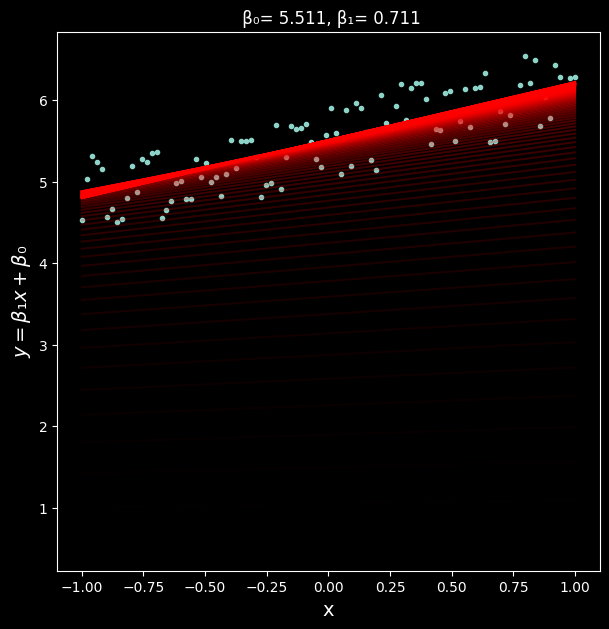

In [57]:
#Inicializamos optimizador, definimos 100 pasos para no llenar la memoria al dope
optimizer = GradientDescent(learning_rate=.05, max_iters=100, record_history=True) 
model = LinearRegression() #inicializamos nuestro objeto regresion 
model.fit(x_rl,y_rl, optimizer) #entrenamos el modelo

print("Valor de b0 encontrado: %0.2f" % model.betas[1])
print("Valor de b1 encontrado: %0.2f" % model.betas[0])

_ = plt.figure(figsize=(7,7))
_ = plt.plot(x_rl, y_rl, '.')

for t,w in enumerate(optimizer.w_history):
    _ = plt.plot(x_rl, x_rl*w[0]+w[1], 'r-', alpha=t/len(optimizer.w_history), label=str(t))
_ = plt.xlabel('x',fontsize=14)
_ = plt.ylabel('$y= β₁x+ β₀$', fontsize=14)
_ = plt.title(f" β₀= {model.betas[1]:.3f}, β₁= {model.betas[0]:.3f}")

<div style="text-align: justify; font-size: 1.1rem;">

Claramente, los valores de $b_0$ y de $b_1$ obtenidos con esta implementación propia del gradiente descendiente, por medio de un método iterativo, son muy similares a los obtenidos al principio de este ejemplo mediante la fórmula del método analítico que veníamos conociendo de la clase 1 de Vectores.

Veamos el modulo de los errores entre:

- la prediccion con el valor analítico de los parámetros de la regresión lineal, i.e. `predictions_exact`
- el valor predicho por el método del gradiente descendiente `predictions_gd`  
</div>

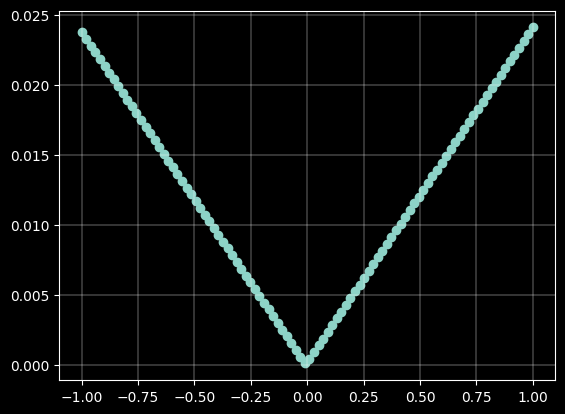

In [58]:
predictions_exact = b0 + b1*x_rl
predictions_gd = model.predict(x_rl)

_ = plt.scatter(x_rl, np.abs(predictions_exact - predictions_gd)) 
_ = plt.grid(linewidth=0.3)